In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Loading The Datasets

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dropping column RowNumber

df.drop('RowNumber',axis=1,inplace=True)

### Info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### Shape of the Dataset

In [5]:
print("The Number of Rows present in the Datasets are : ", df.shape[0])
print("The Number of Columns present in the Datasets are : ", df.shape[1])

The Number of Rows present in the Datasets are :  10000
The Number of Columns present in the Datasets are :  13


#### Statistical Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


* 50%  or don't possess Credit Cards.
* 50% of the customers are not active.

#### Checking for Null Values

In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Check for Duplicates

In [8]:
df.duplicated().sum()

0

### Categorical Variable Count

In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
cat_col = ['Geography', 'Gender','Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']
for col in cat_col:
    print(df[col].value_counts())
    print("----------------------")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
----------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
----------------------
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
----------------------
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
----------------------
Exited
0    7963
1    2037
Name: count, dtype: int64
----------------------


### Outlier Detection

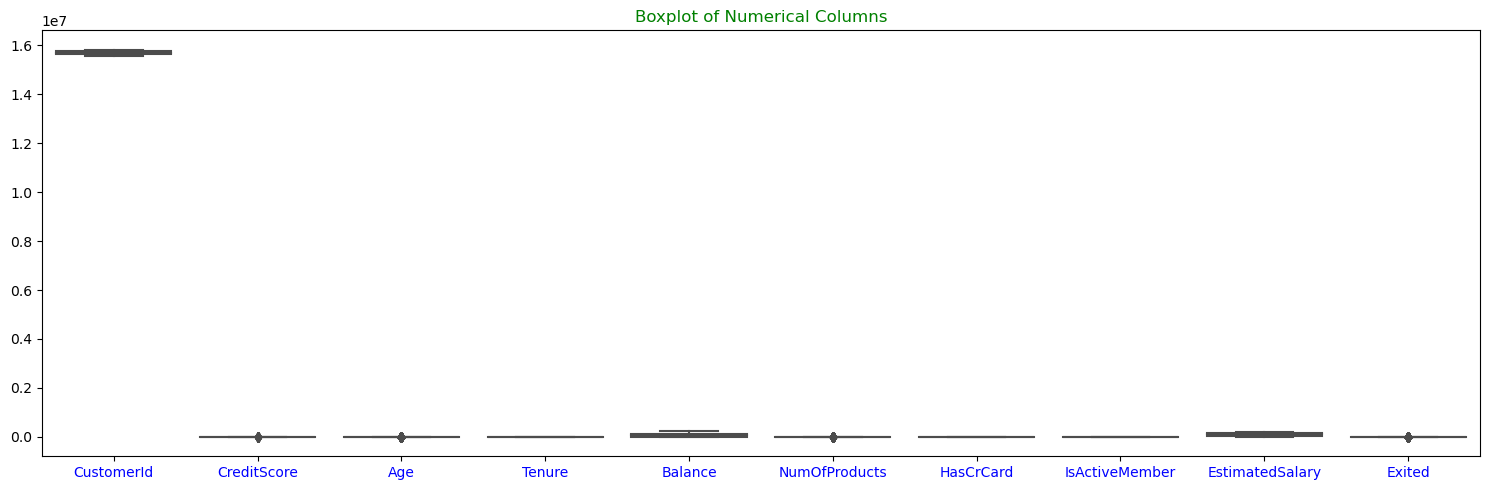

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(df,palette='gist_rainbow')
plt.title("Boxplot of Numerical Columns",color='green')
plt.xticks(color='blue')
plt.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

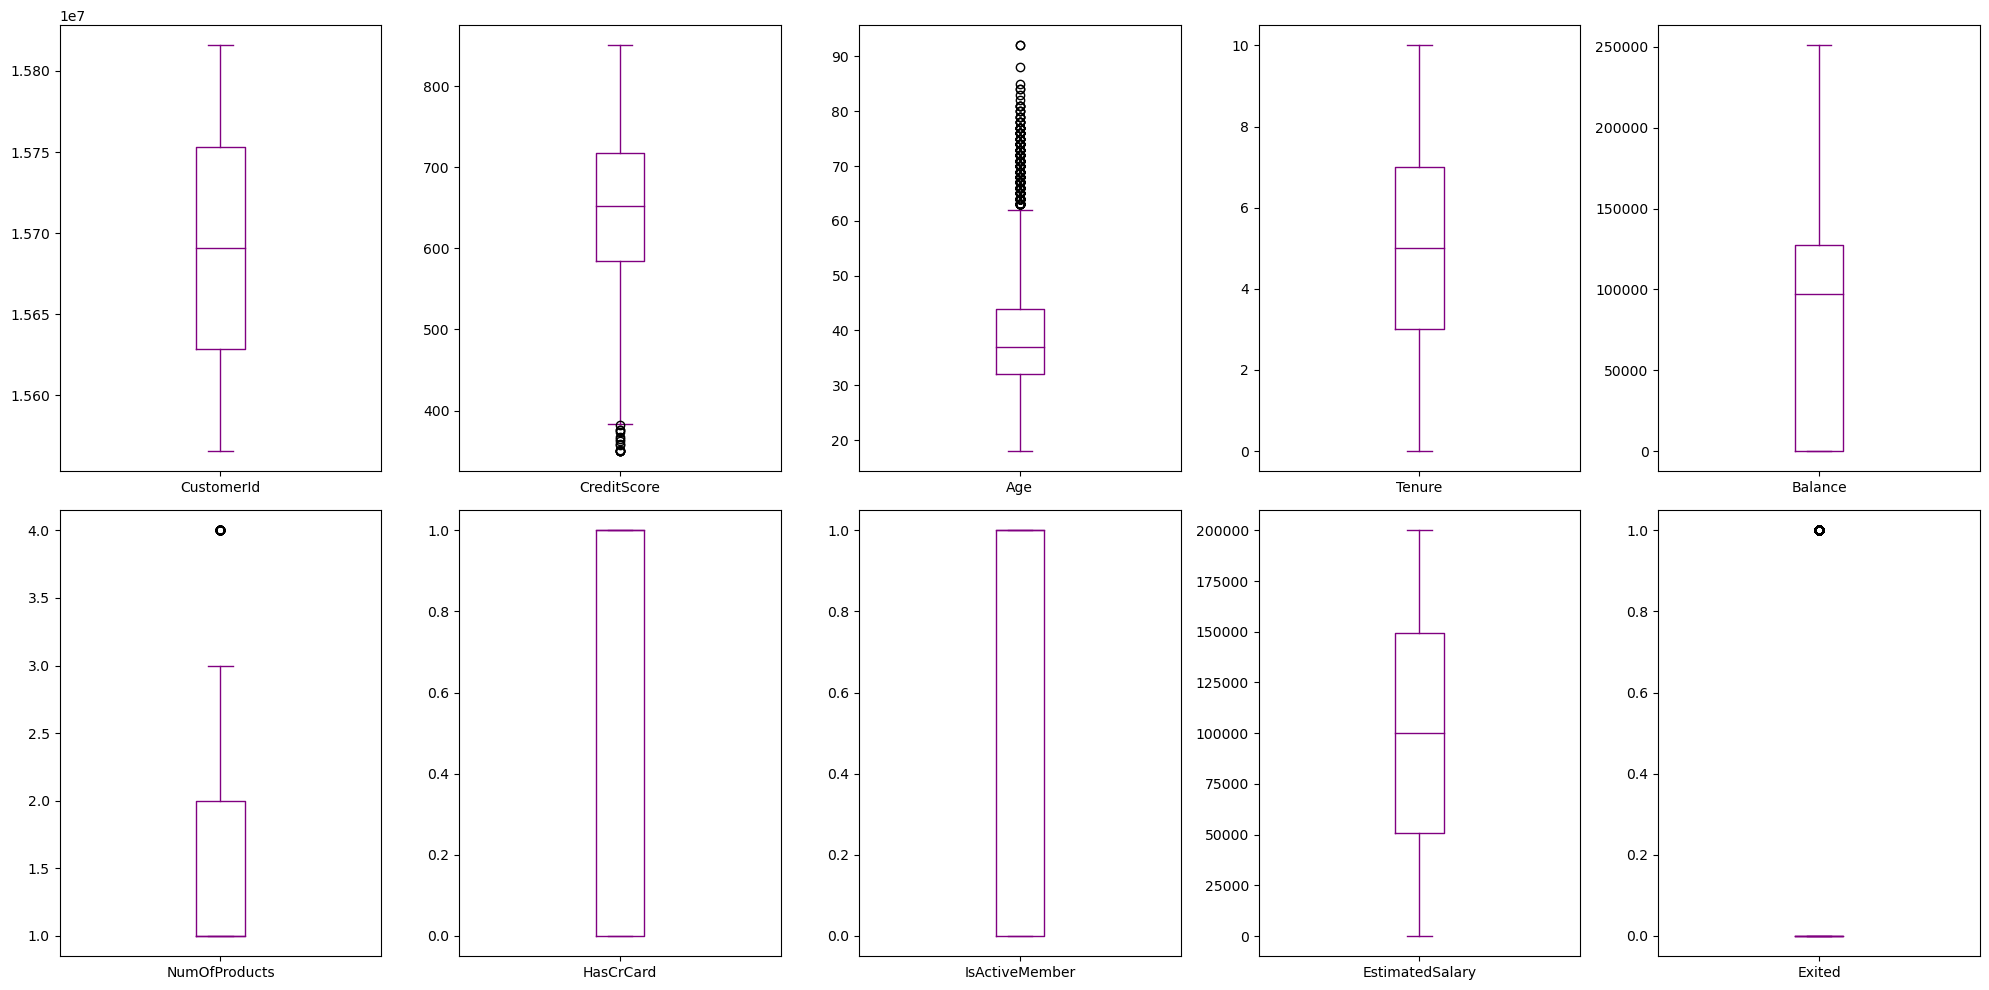

In [12]:
plt.figure(figsize=(5,3))
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='purple')
plt.tight_layout()
plt.show()

In [13]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Categorical Variable Distribution

<Figure size 500x300 with 0 Axes>

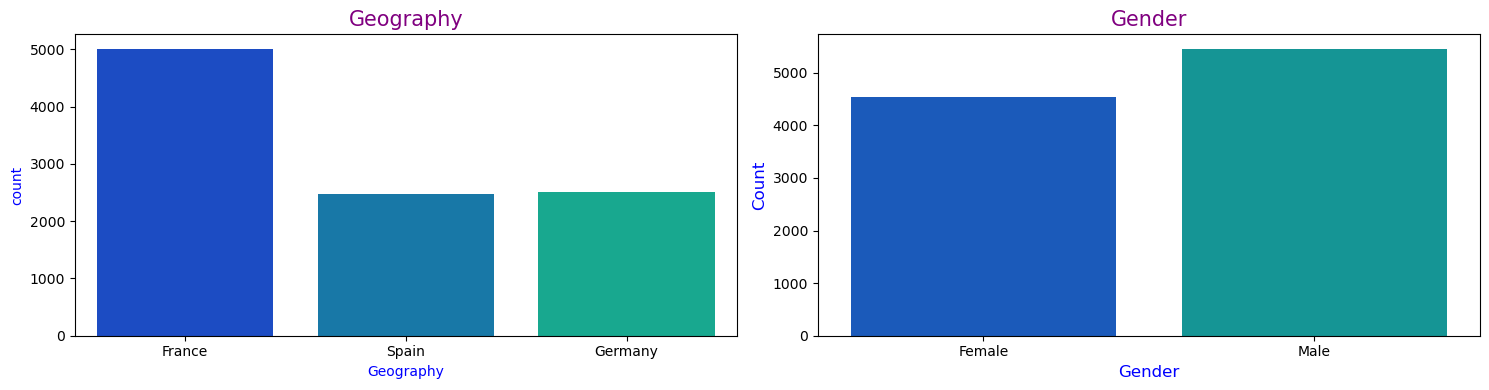

In [14]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['Geography'],palette='winter',ax=axes[0])
ax.set_title("Geography",color='purple',fontsize=15)
ax.set_xlabel("Geography",color='blue')
ax.set_ylabel("count",color='blue')

ax1 = sns.countplot(x=df['Gender'],ax=axes[1],palette='winter')
ax1.set_title("Gender",color='purple',fontsize=15)
ax1.set_xlabel("Gender",color='blue',fontsize=12)
ax1.set_ylabel("Count",color='blue',fontsize=12)
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

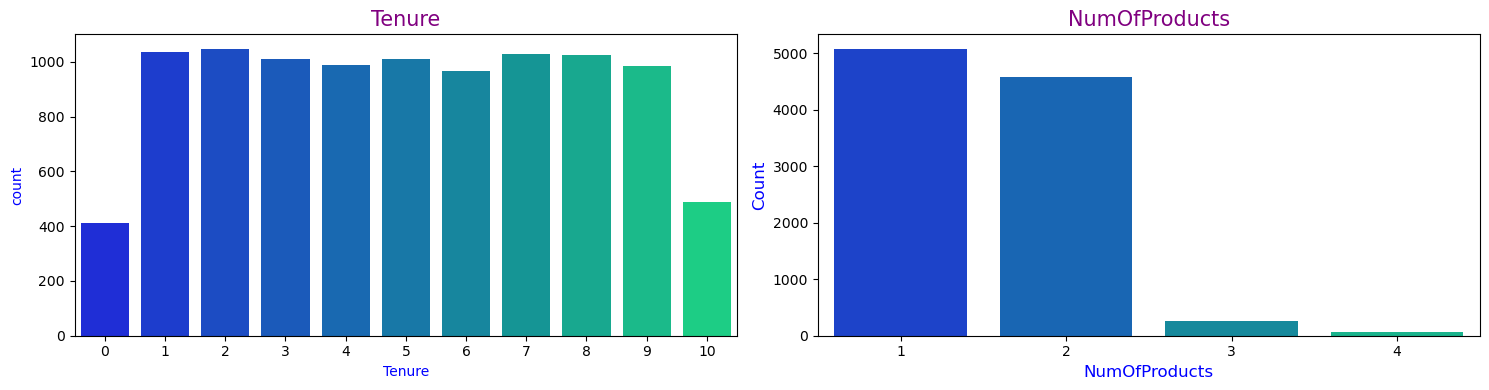

In [15]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['Tenure'],palette='winter',ax=axes[0])
ax.set_title("Tenure",color='purple',fontsize=15)
ax.set_xlabel("Tenure",color='blue')
ax.set_ylabel("count",color='blue')

ax1 = sns.countplot(x=df['NumOfProducts'],ax=axes[1],palette='winter')
ax1.set_title("NumOfProducts",color='purple',fontsize=15)
ax1.set_xlabel("NumOfProducts",color='blue',fontsize=12)
ax1.set_ylabel("Count",color='blue',fontsize=12)
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

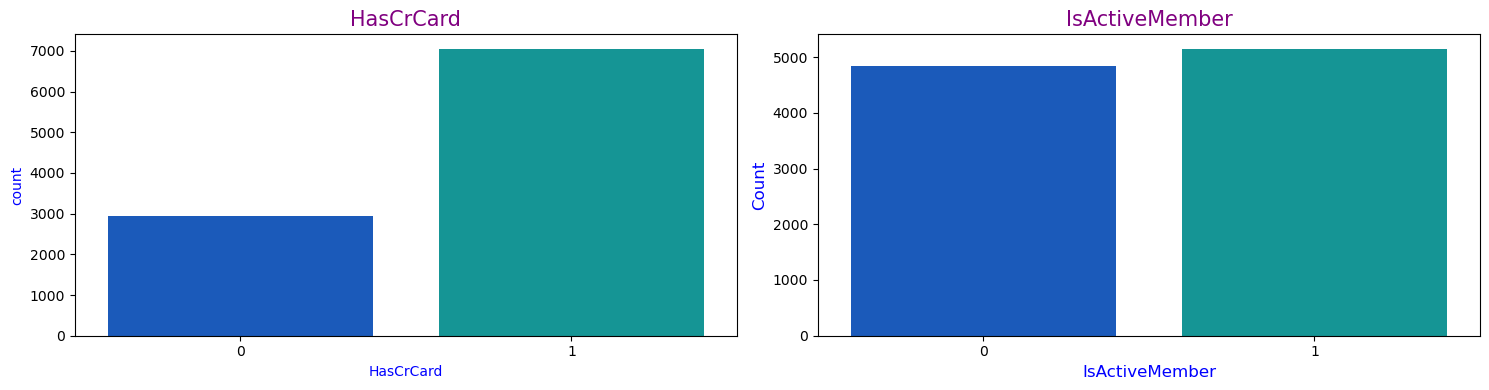

In [16]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['HasCrCard'],palette='winter',ax=axes[0])
ax.set_title("HasCrCard",color='purple',fontsize=15)
ax.set_xlabel("HasCrCard",color='blue')
ax.set_ylabel("count",color='blue')

ax1 = sns.countplot(x=df['IsActiveMember'],ax=axes[1],palette='winter')
ax1.set_title("IsActiveMember",color='purple',fontsize=15)
ax1.set_xlabel("IsActiveMember",color='blue',fontsize=12)
ax1.set_ylabel("Count",color='blue',fontsize=12)
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()

### Distribution of Target Variable

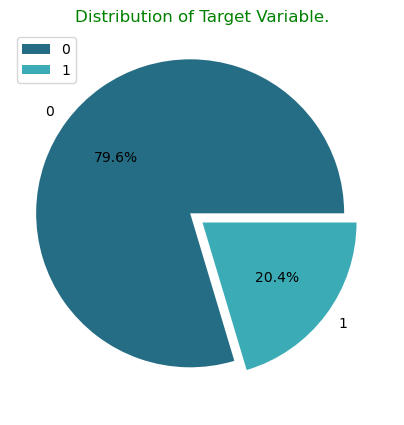

In [17]:
plt.figure(figsize=(5,5))
label = df['Exited'].value_counts().keys()
plt.pie(data=df,x=df['Exited'].value_counts(),labels=label,autopct="%.1f%%",explode=[0.1, 0],colors= ['#256D85', '#3BACB6'])
plt.title("Distribution of Target Variable.",color='green')
#print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(loc='upper left')     # loc='upper left'

plt.show()

* There is Class Imbalance in Target Column.

### Distribution of Continuous Variable

In [18]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
cont_col = ['CreditScore','Age','Balance','EstimatedSalary']

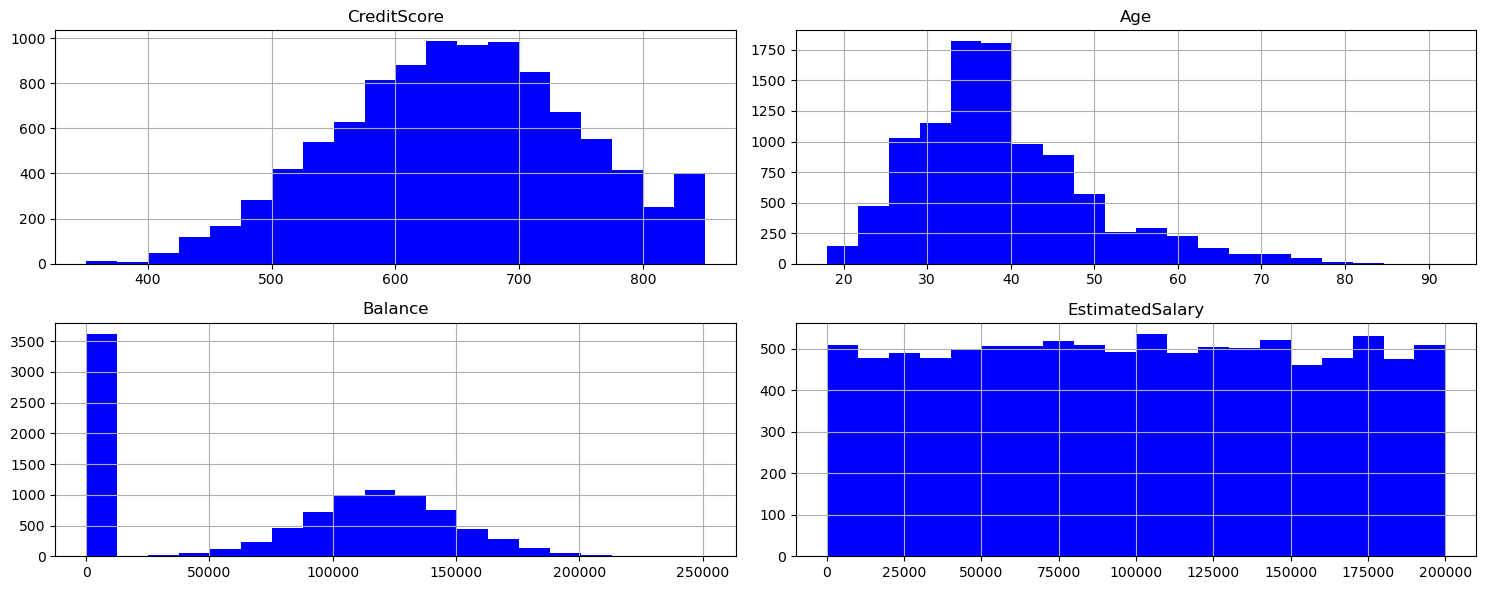

In [20]:
df.hist(cont_col,figsize=(15,6),color='blue',bins=20)
#sns.histplot(df)
plt.tight_layout()
plt.show()

### Estimated Salary Distribution

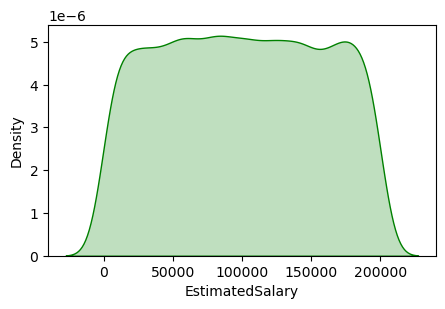

In [21]:
plt.figure(figsize=(5,3))
sns.kdeplot(df["EstimatedSalary"], fill=True,color='green');

### Balance Distribution

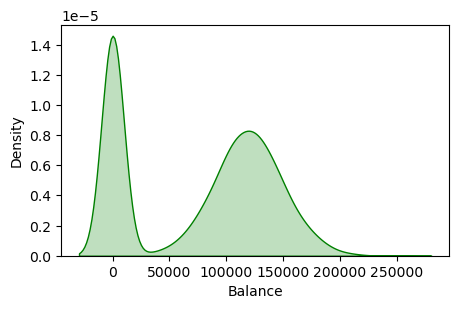

In [22]:
plt.figure(figsize=(5,3))
sns.kdeplot(df["Balance"], fill=True,color='green');

### Credit Score Distribution

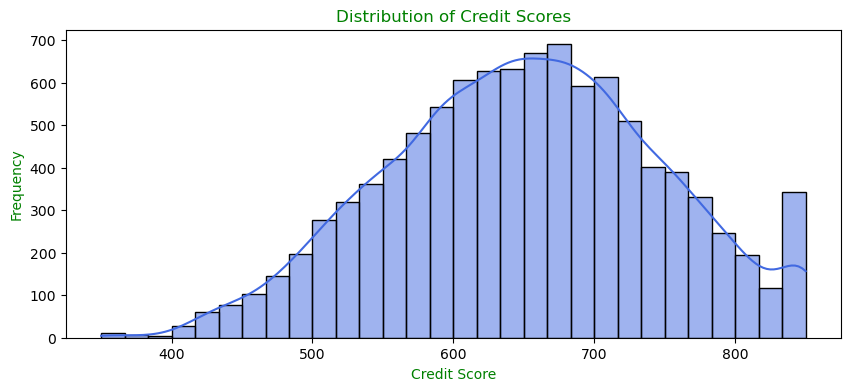

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores',color='green')
plt.xlabel('Credit Score',color='green')
plt.ylabel('Frequency',color='green')
plt.show()

### Tenure Distribution

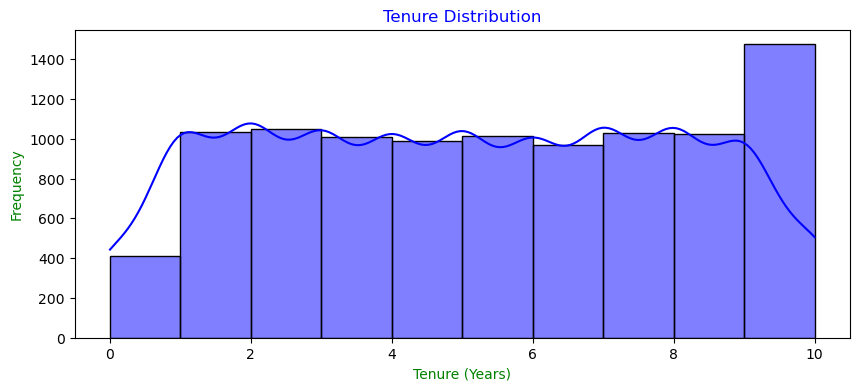

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Tenure'], bins=10, kde=True, color='blue')
plt.title('Tenure Distribution',color='blue')
plt.xlabel('Tenure (Years)',color='green')
plt.ylabel('Frequency',color='green')
plt.show()


### Age distribution with Target

<Axes: xlabel='Age', ylabel='Count'>

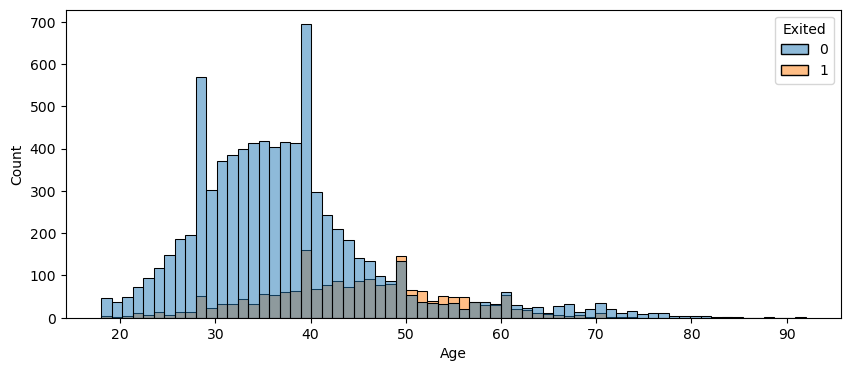

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(x='Age',data=df,color='green',hue='Exited')

<Figure size 500x300 with 0 Axes>

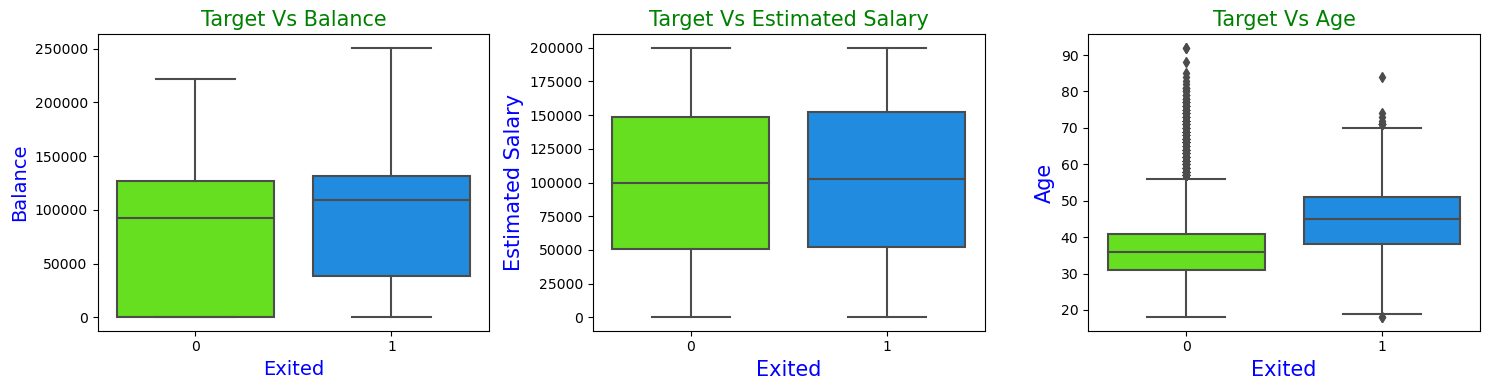

In [26]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
ax=sns.boxplot(x=df['Exited'],y=df['Balance'],palette='gist_rainbow',ax=axes[0])
ax.set_title("Target Vs Balance",color='green',fontsize=15)
ax.set_xlabel("Exited",color='blue',fontsize=14)
ax.set_ylabel("Balance",color='blue',fontsize=14)

ax1 = sns.boxplot(x=df['Exited'],y=df['EstimatedSalary'],ax=axes[1],palette='gist_rainbow')
ax1.set_title("Target Vs Estimated Salary",color='green',fontsize=15)
ax1.set_xlabel("Exited",color='blue',fontsize=15)
ax1.set_ylabel("Estimated Salary",color='blue',fontsize=15);
 
ax2 = sns.boxplot(x=df['Exited'],y=df['Age'],ax=axes[2],palette='gist_rainbow')
ax2.set_title("Target Vs Age",color='green',fontsize=15)
ax2.set_xlabel("Exited",color='blue',fontsize=15)
ax2.set_ylabel("Age",color='blue',fontsize=15);

plt.tight_layout()
plt.show()

#plt.xticks(color='purple',fontsize=8)
#plt.yticks(color='purple',fontsize=8);
plt.show()

* Customers who have Exited the servies have more Balance.
* Estimated Salary of both Churners & Non-churners are same.
* Older Age  group customers approx Age > 40 years, churns more.

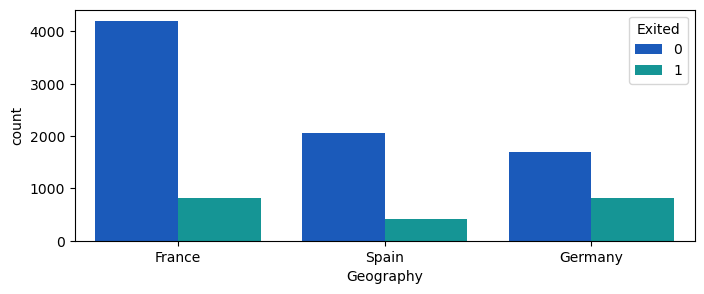

In [27]:
plt.figure(figsize=(8,3))
sns.countplot(x='Geography',data=df,hue='Exited',palette='winter')
plt.show()

* Customers from Germany as Exited more as compared to other countries.

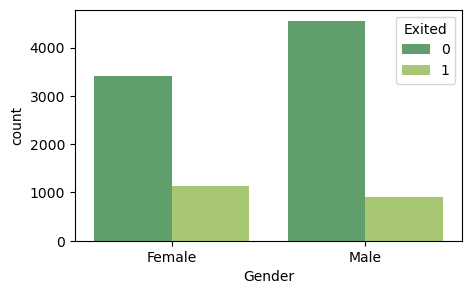

In [28]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df,hue='Exited',palette='summer')
plt.show()

* Female Churns more than Male.

### Credit Score vs. Estimated Salary

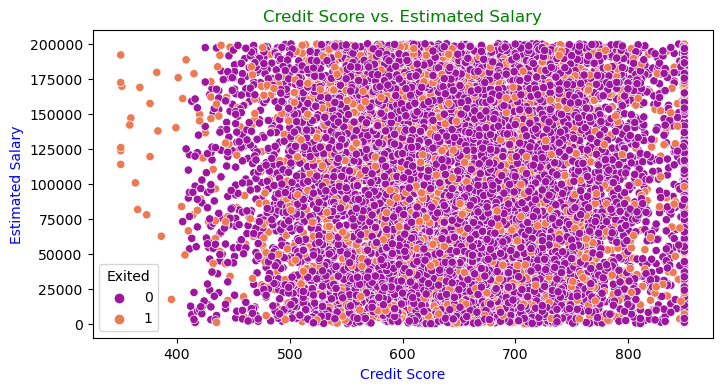

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='plasma')
plt.title('Credit Score vs. Estimated Salary',color='green')
plt.xlabel('Credit Score',color='blue')
plt.ylabel('Estimated Salary',color='blue')
plt.show()


### Age vs. Balance

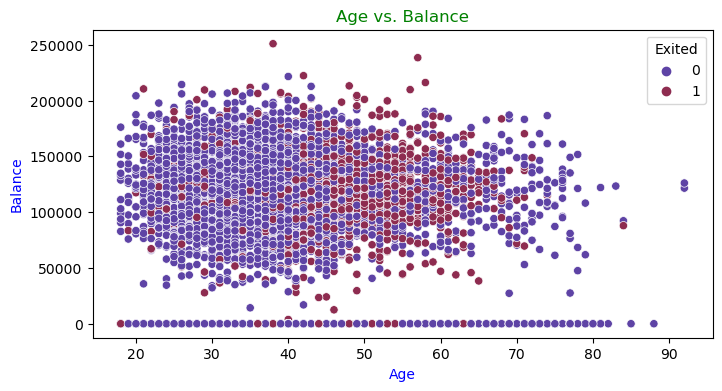

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='twilight')
plt.title('Age vs. Balance',color='green')
plt.xlabel('Age',color='blue')
plt.ylabel('Balance',color='blue')
plt.show()

In [31]:
df.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


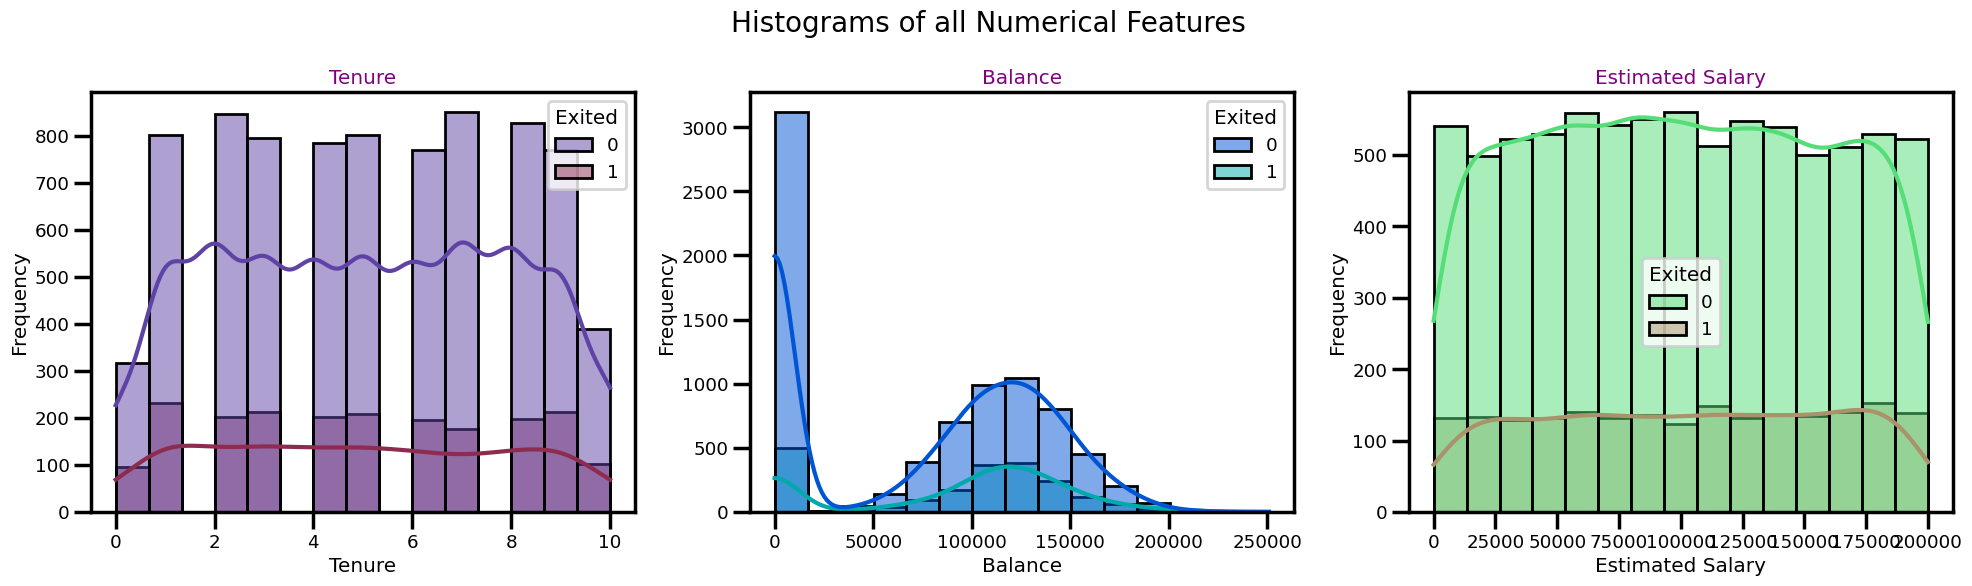

In [32]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = df['Tenure'],color= 'teal', hue= df['Exited'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set_title('Tenure',color='purple')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = df['Balance'], color= 'teal', hue= df['Exited'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set_title('Balance',color='purple')
ax2.set(xlabel= 'Balance', ylabel= 'Frequency')

ax3 = sns.histplot(x = df['EstimatedSalary'], color= 'teal', hue= df['Exited'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set_title('Estimated Salary',color='purple')
ax3.set(xlabel= 'Estimated Salary', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

* Tenure is not directly related to Churn.

### Correlations Heatmap

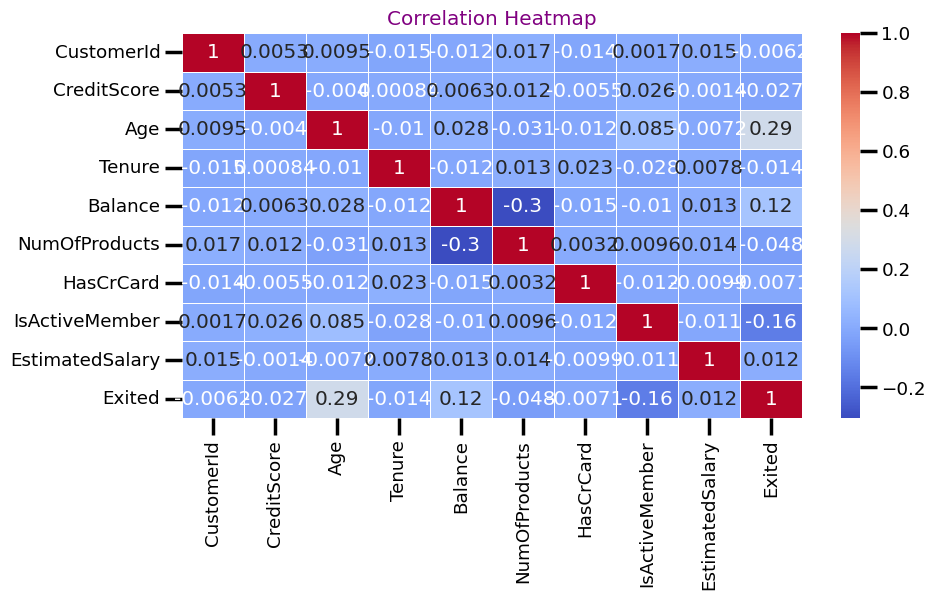

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap',color='purple')
plt.show()

* Age is somewhat Correlated with the Target Variable.

In [34]:
print(f'Probability of a customer being exited given they have a credit card, {round(df[(df["HasCrCard"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they do not have a credit card, {round(df[(df["HasCrCard"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they have a credit card, 69.91 % 
Probability of a customer being exited given they do not have a credit card, 30.09 % 


In [35]:
df[(df["Exited"] == 1)].count()[1]

2037

In [36]:
print(f'Probability of a customer being exited given they are activeMember, {round(df[(df["IsActiveMember"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they are not active Member, {round(df[(df["IsActiveMember"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they are activeMember, 36.08 % 
Probability of a customer being exited given they are not active Member, 63.92 % 


### Statistical Summary of the Customers who have Churned

In [37]:
df[df['Exited'] == 1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,2037.0,NaN,NaN,NaN,15690051.964654,72692.62392,15565706.0,15627360.0,15688963.0,15753092.0,15815656.0
Surname,2037,1188,Smith,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,2037.0,NaN,NaN,NaN,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0
Geography,2037,3,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2037,2,Female,1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2037.0,NaN,NaN,NaN,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0
Tenure,2037.0,NaN,NaN,NaN,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0
Balance,2037.0,NaN,NaN,NaN,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09
NumOfProducts,2037.0,NaN,NaN,NaN,1.475209,0.801521,1.0,1.0,1.0,2.0,4.0
HasCrCard,2037.0,NaN,NaN,NaN,0.699067,0.458776,0.0,0.0,1.0,1.0,1.0


**Useful Insights**

* Total Churners = 2037
* Min Credit score = 350 & Max Credit score = 850
* Customers from Germany churns more.
* Churners are mostly Females.
* Average Tenure is of 5 yrs. and Max of 10 years.
* 25% of the customers don't have Credit Cards.

### Outlier Treatment

In [38]:
#Checking numbers of observations beyond Upper & Lower Limit
Outlier_col = ['CreditScore','Age']
Q1 = df[Outlier_col].quantile(0.25)
Q3 = df[Outlier_col].quantile(0.75)
UL = Q3
LL = Q1
outliers = ((df[Outlier_col] > UL) | (df[Outlier_col] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


CreditScore    4954
Age            4712
dtype: int64

In [39]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [40]:
# Cap & floor the values beyond the outlier boundaries
#col = credit_df.drop['Default']
for i in Outlier_col:
    LL,UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL,UL,df[i])
    df[i] = np.where(df[i] < LL,LL,df[i])

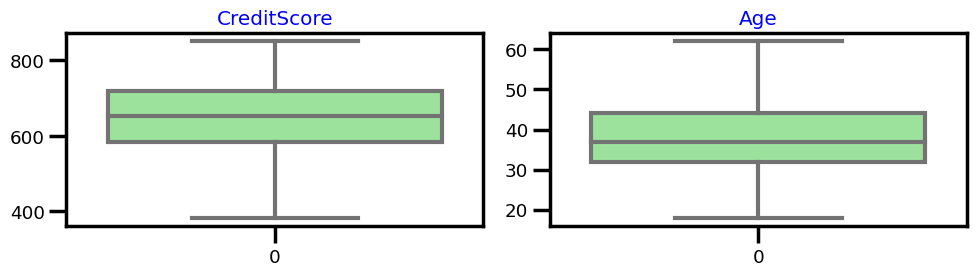

In [41]:
Outlier_col = ['CreditScore','Age']
fig=plt.figure(figsize=(10,3))
#plt.suptitle('Boxplot Post Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(Outlier_col)):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[Outlier_col[i]],color='lightgreen')
    plt.title(Outlier_col[i],color='blue')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()

### Let's drop Unnecessary Columns 

In [42]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [43]:
df.drop(columns=['CustomerId', 'Surname'],axis=1,inplace=True)

### Data Encoding

In [44]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.0,1,1,1,101348.88,1


In [45]:
cat_columns = ['Geography','Gender']

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [48]:
df['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [49]:
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

### Treating Target imbalance using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE 

In [51]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [52]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [53]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [54]:
print(X_res.shape)
print(y_res.shape)

(15926, 10)
(15926,)


In [55]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### Train - Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=42)

In [58]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (11148, 10)
Shape of X_test : (4778, 10)
Shape of y_train : (11148,)
Shape of y_test : (4778,)


### Feature Transformation

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
sc = MinMaxScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [61]:
print("Shape of X_train :",X_train_sc.shape)
print("Shape of X_test :",X_test_sc.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (11148, 10)
Shape of X_test : (4778, 10)
Shape of y_train : (11148,)
Shape of y_test : (4778,)


In [62]:
X_train_sc.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.522484,0.5,0.0,0.477273,0.5,0.496564,0.0,1.0,0.0,0.465650
1,0.734475,1.0,1.0,0.409091,0.2,0.000000,0.0,1.0,0.0,0.975997


In [63]:
X_test_sc.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.325482,0.0,0.0,0.250000,0.5,0.000000,0.333333,0.0,1.0,0.263515
1,0.477516,0.5,0.0,0.522727,0.4,0.528783,0.000000,1.0,0.0,0.782399


### Model Building

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

### Logistic Regression Model

In [65]:
lgt = LogisticRegression(random_state=4)
lgt.fit(X_train_sc,y_train)

LogisticRegression(random_state=4)

#### Accuracy of Training and Test Data.

In [66]:
print("Accuracy of the Training Data: ",lgt.score(X_train_sc,y_train))
print("Accuracy of the Test Data: ",lgt.score(X_test_sc,y_test))

Accuracy of the Training Data:  0.7782561894510226
Accuracy of the Test Data:  0.7785684386772709


In [67]:
ypred_train = lgt.predict(X_train_sc)
ypred_test = lgt.predict(X_test_sc)

In [68]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Logistic Regression'])
resultsDf

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197


## Applying GridSearchCV on Logistic Regression

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid = {'penalty':['l2'],
        'solver':['newton-cg','liblinear','lbfgs','sag'],
        'tol':[0.0001,0.00001]}
grid_search = GridSearchCV(estimator=lgt,param_grid=grid,cv=10,n_jobs=-1,scoring='f1',verbose=1)
grid_search.fit(X_train_sc,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=4), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [71]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(random_state=4, solver='sag')


In [72]:
best_model_lgt = grid_search.best_estimator_
best_model_lgt.fit(X_train_sc,y_train)

LogisticRegression(random_state=4, solver='sag')

In [73]:
print("Accuracy on Train Data: ",best_model_lgt.score(X_train_sc,y_train))
print("Accuracy on Test Data: ",best_model_lgt.score(X_test_sc,y_test))

Accuracy on Train Data:  0.7782561894510226
Accuracy on Test Data:  0.7785684386772709


In [74]:
ypred_train = best_model_lgt.predict(X_train_sc)
ypred_test = best_model_lgt.predict(X_test_sc)

In [75]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Logistic Regression Tuned'])
comp_table = pd.concat([resultsDf,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197


### Decission Tree Classifier

In [76]:
dt = DecisionTreeClassifier(max_depth=7,random_state=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=4)

#### Accuracy of the Train and Test data

In [77]:
print("Accuracy Score for Training Data is: ", dt.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", dt.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8352170792967348
Accuracy Score for Test Data is:  0.8168689828380076


In [78]:
ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

In [79]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Decission Tree'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824


In [80]:
# comp_table.drop('Decission Tree',axis=0,inplace=True)

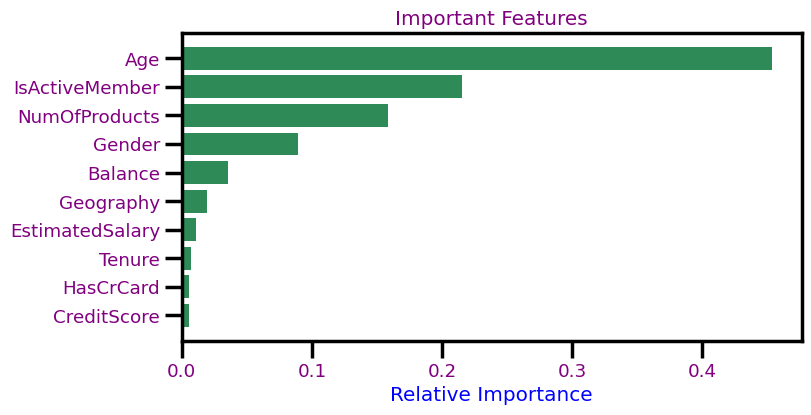

In [81]:
imp = dt.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="seagreen", align="center")
plt.title("Important Features",color='purple')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Applying GridsearchCV on Decission Tree Model

In [82]:
grid = {'criterion':["gini", "entropy", "log_loss"],
        'max_depth':[7,10,20,30],
        'min_samples_split':[2,3,5,7],
        'min_samples_leaf':[2,3,4,5],
         'max_leaf_nodes':[50,100,150,200],
        'min_impurity_decrease':[0.001,0.0001],
        }
grid_search = GridSearchCV(estimator = dt, param_grid = grid, cv = 10,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 1536 candidates, totalling 15360 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=7, random_state=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 10, 20, 30],
                         'max_leaf_nodes': [50, 100, 150, 200],
                         'min_impurity_decrease': [0.001, 0.0001],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [83]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 3, 'min_samples_split': 7} 

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=200,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       min_samples_split=7, random_state=4)


In [84]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=200,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       min_samples_split=7, random_state=4)

In [85]:
print("Accuracy of Train data: ",best_model_dt.score(X_train,y_train))
print("Accuracy of Test data: ",best_model_dt.score(X_test,y_test))

Accuracy of Train data:  0.8754933620380337
Accuracy of Test data:  0.8340309753034743


In [86]:
ypred_train = best_model_dt.predict(X_train)
ypred_test = best_model_dt.predict(X_test)

In [87]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Decission Tree Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571


In [161]:
# comp_table.drop('Decission Tree Tuned',axis=0,inplace=True)

### Random Forest

In [88]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=7,random_state=4)      # 100, 500, 1000, 2000,5000
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=4)

#### Accuracy of Train and Test data

In [89]:
print("Accuracy on Training data: ",rf.score(X_train,y_train))
print("Accuracy on Test data: ",rf.score(X_test,y_test))

Accuracy on Training data:  0.8470577682095443
Accuracy on Test data:  0.8267057346169946


In [90]:
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

In [91]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Random Forest'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935


In [ ]:
'''plt.figure(figsize=(60, 20))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=False)
plt.title("Decision Tree Classifier")
plt.show()'''

In [96]:
Param_grid = {
              'min_samples_split' : [10,20,30],
              'min_samples_leaf':[5,10,15],
              'max_depth':[8,10,15,20,30],'max_features' : ["sqrt", "log2"],
              'n_estimators':[50,100,150]
             }
grid_search = GridSearchCV(estimator=rf,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, n_estimators=1000,
                                              random_state=4),
             param_grid={'max_depth': [8, 10, 15, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

In [97]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150} 

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150, random_state=4)


In [98]:
best_modelRF = grid_search.best_estimator_
best_modelRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150, random_state=4)

In [99]:
print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

Accuracy on Train data:  0.9213311804808038
Accuracy on Test data:  0.8472164085391377


In [100]:
ypred_train = best_modelRF.predict(X_train)
ypred_test = best_modelRF.predict(X_test)

In [101]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Random Forest Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750


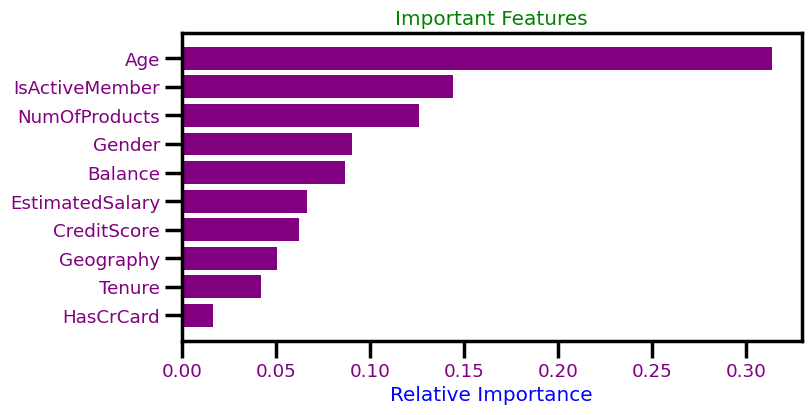

In [102]:
imp = best_modelRF.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="purple")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Bagging Classifier

In [103]:
from sklearn.ensemble import BaggingClassifier

In [120]:
bgcl = BaggingClassifier(n_estimators=800,random_state=4)
bgcl.fit(X_train, y_train)

BaggingClassifier(n_estimators=800, random_state=4)

#### Accuracy of Train and Test Dataset

In [121]:
print("Accuracy of Train Data  : ",bgcl.score(X_train,y_train))
print("Accuracy of Test Data  : ",bgcl.score(X_test,y_test))

Accuracy of Train Data  :  1.0
Accuracy of Test Data  :  0.8599832565927166


In [122]:
ypred_train = bgcl.predict(X_train)
ypred_test = bgcl.predict(X_test)

In [123]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Bagging Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750
Bagging Classifier,1.000000,0.859983,0.863813,0.849490,0.856592


### Applying GridsearchCV on Bagging

In [124]:
param_grid = {
              "max_samples": np.arange(0.2, 1, 0.1),
              "n_estimators": [40, 50, 60],
              "max_features": np.arange(0.2, 1, 0.1),
             }
grid_search = GridSearchCV(estimator=bgcl,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(n_estimators=800, random_state=4),
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [40, 50, 60]})

In [125]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_features': 0.4000000000000001, 'max_samples': 0.9000000000000001, 'n_estimators': 60} 

BaggingClassifier(max_features=0.4000000000000001,
                  max_samples=0.9000000000000001, n_estimators=60,
                  random_state=4)


In [126]:
best_model_bagging = grid_search.best_estimator_
best_model_bagging.fit(X_train,y_train)

BaggingClassifier(max_features=0.4000000000000001,
                  max_samples=0.9000000000000001, n_estimators=60,
                  random_state=4)

In [127]:
print("Accuracy on Train Data: ",best_model_bagging.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_bagging.score(X_test,y_test))

Accuracy on Train Data:  0.9955148905633298
Accuracy on Test Data:  0.9003767266638761


In [128]:
ypred_train = best_model_bagging.predict(X_train)
ypred_test = best_model_bagging.predict(X_test)

In [129]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Bagging Classifier Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750
Bagging Classifier,1.000000,0.859983,0.863813,0.849490,0.856592
Bagging Classifier Tuned,0.995515,0.900377,0.933457,0.858844,0.894597


### AdaBoost Classifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
ADB_model = AdaBoostClassifier(n_estimators=8000,random_state=4)  # 1500--88,88 #2000--89,88 #2500--89,89  #3000--90,89 #5000--90,89
ADB_model.fit(X_train,y_train)      # 8000--91,89

AdaBoostClassifier(n_estimators=8000, random_state=4)

In [156]:
print("Accuracy on Train Data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_model.score(X_test,y_test))

Accuracy on Train Data:  0.9144241119483315
Accuracy on Test Data:  0.8917957304311427


In [157]:
ypred_train = ADB_model.predict(X_train)
ypred_test = ADB_model.predict(X_test)

In [158]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Ada Boost Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750
Bagging Classifier,1.000000,0.859983,0.863813,0.849490,0.856592
Bagging Classifier Tuned,0.995515,0.900377,0.933457,0.858844,0.894597
Ada Boost Classifier,0.914424,0.891796,0.903297,0.873724,0.888265


### Gradient Boosting Classifier

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
gbc_model=GradientBoostingClassifier(n_estimators=800,random_state=42)      # 100--85,85 #500--92,89 1000--94,90 #800-93,90
gbc_model.fit(X_train, y_train)                                             #1500--96,90 #1800--97,90

GradientBoostingClassifier(n_estimators=800, random_state=42)

In [185]:
print("Accuracy on Train Data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test Data: ",gbc_model.score(X_test,y_test))

Accuracy on Train Data:  0.9385540007176175
Accuracy on Test Data:  0.9037254081205526


In [222]:
ypred_train = gbc_model.predict(X_train)
ypred_test = gbc_model.predict(X_test)

In [187]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Gradient Boosting Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750
Bagging Classifier,1.000000,0.859983,0.863813,0.849490,0.856592
Bagging Classifier Tuned,0.995515,0.900377,0.933457,0.858844,0.894597
Ada Boost Classifier,0.914424,0.891796,0.903297,0.873724,0.888265
Gradient Boosting Classifier,0.938554,0.903725,0.917845,0.883503,0.900347


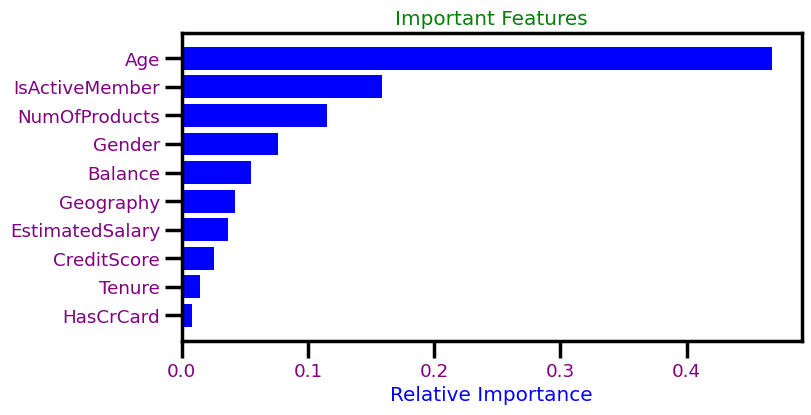

In [198]:
imp = gbc_model.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='blue')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### GridSearchCV on Gradient Boost

In [192]:
Param_grid = {'n_estimators':[50,100,150,200,500],'criterion' : ['friedman_mse', 'squared_error'],
              'loss' : ['log_loss', 'exponential'],'max_features' : ['sqrt', 'log2'],
               'max_depth':[3,5,10,20,30],'max_leaf_nodes':[2,5]
             }
grid_search = GridSearchCV(estimator=gbc_model,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=800,
                                                  random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5],
                         'n_estimators': [50, 100, 150, 200, 500]})

In [193]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'n_estimators': 500} 

GradientBoostingClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=5,
                           n_estimators=500, random_state=42)


In [194]:
best_model_gdb = grid_search.best_estimator_
best_model_gdb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=5,
                           n_estimators=500, random_state=42)

In [195]:
print("Accuracy on Train Data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_gdb.score(X_test,y_test))

Accuracy on Train Data:  0.8919985647649803
Accuracy on Test Data:  0.8694014231896191


In [196]:
ypred_train = best_model_gdb.predict(X_train)
ypred_test = best_model_gdb.predict(X_test)

In [197]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Gradient Boosting Classifier Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.778256,0.778568,0.767577,0.789116,0.778197
Logistic Regression Tuned,0.778256,0.778568,0.767577,0.789116,0.778197
Decission Tree,0.835217,0.816869,0.828368,0.792092,0.809824
Decission Tree Tuned,0.875493,0.834031,0.846907,0.809099,0.827571
Random Forest,0.847058,0.826706,0.831593,0.812500,0.821935
Random Forest Tuned,0.921331,0.847216,0.849569,0.838010,0.843750
Bagging Classifier,1.000000,0.859983,0.863813,0.849490,0.856592
Bagging Classifier Tuned,0.995515,0.900377,0.933457,0.858844,0.894597
Ada Boost Classifier,0.914424,0.891796,0.903297,0.873724,0.888265
Gradient Boosting Classifier,0.938554,0.903725,0.917845,0.883503,0.900347


### Best Optimal Model

* Best Optimal model is Gradient Boosting Classifier model.
* The Accuracy in Train data is 93% and in Testing data Accuracy is 90%.

### Performance Metrices of the most optimal model

In [221]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

### Classification Report

In [223]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ypred_train),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ypred_test))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5537
           1       0.96      0.92      0.94      5611

    accuracy                           0.94     11148
   macro avg       0.94      0.94      0.94     11148
weighted avg       0.94      0.94      0.94     11148
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.89      0.92      0.91      2426
           1       0.92      0.88      0.90      2352

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778



### Confusion Matrix

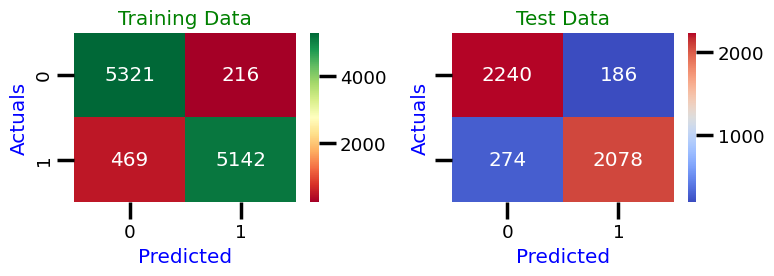

In [224]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ypred_train)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ypred_test)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

### Measuring and Plotting AUC-ROC Curve

AUC for the Training Data: 0.986
AUC for the Test Data: 0.958


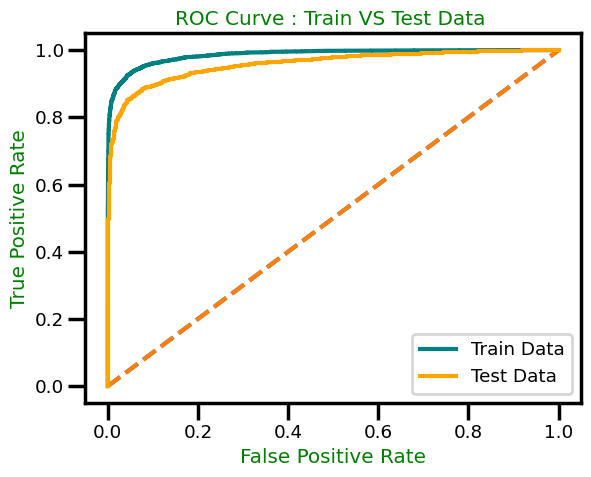

In [225]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = gbc_model.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = gbc_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data ",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Observations:**

* AUC for Train data is 98% and AUC for Test data is 95%.
* The AUC & ROC curve shows that it is covering almost the same area for Train and Test data. Therefore, this is considered a     Generalized good model.
* Also the AUC score is high and is able to distinguish between Positive and Negative classes vey well.

### XGBoost Classifier

In [200]:
from xgboost import XGBClassifier

In [215]:
xgb = XGBClassifier(eval_metric="logloss", n_estimators=2000,max_depth =10,random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [216]:
print("Accuracy on Train Data: ",xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",xgb.score(X_test,y_test))

Accuracy on Train Data:  1.0
Accuracy on Test Data:  0.8792381749686061


In [217]:
param_grid = {
               "n_estimators": [50,100,200],  # np.arange(10, 100, 10),
               "scale_pos_weight": [5],  # [0, 1, 2, 5],
               "subsample": [0.5,1],  # [0.5, 0.7, 0.9, 1],
               "learning_rate": [0.01,0.2,0.2],  # [0.01, 0.1, 0.2, 0.05],
               "gamma": [1,3],  # [0, 1, 3],
               "colsample_bytree": [0.9,1],  # [0.5, 0.7, 0.9, 1],
               "colsample_bylevel": [0.5,1],  # [0.5, 0.7, 0.9, 1],
            }
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=2000,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bylevel': [0.5, 1],
                         'colsample_bytree': [0.9, 1], 'gamma': [1, 3],
                         'learning_rate': [0.01, 0.2, 0.2],
                         'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [5], 'subsample': [0.5, 1]})

In [218]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'colsample_bylevel': 1, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.2, 'n_estimators': 200, 'scale_pos_weight': 5, 'subsample': 0.5} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [219]:
best_model_xgb = grid_search.best_estimator_
best_model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [220]:
print("Accuracy on Train Data: ",best_model_xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_xgb.score(X_test,y_test))

Accuracy on Train Data:  0.9921959095801938
Accuracy on Test Data:  0.8597739640016744
